In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
df_x=pd.read_csv('Diabetes_XTrain.csv')
df_y=pd.read_csv('Diabetes_YTrain.csv')
df_xt=pd.read_csv('Diabetes_Xtest.csv')
ytest=pd.read_csv('sample_submission.csv').values

In [92]:
print(df_x.shape)
print(df_y.shape)

df=pd.concat([df_x,df_y],axis=1)
df_x

(576, 8)
(576, 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23
572,7,187,68,39,304,37.7,0.254,41
573,2,122,60,18,106,29.8,0.717,22
574,4,154,72,29,126,31.3,0.338,37


In [136]:
cnt=df.Outcome.values
x_val=df.iloc[:,:-1].values
x=np.unique(cnt,return_counts=True)[0]
height=np.unique(cnt,return_counts=True)[1]

<BarContainer object of 2 artists>

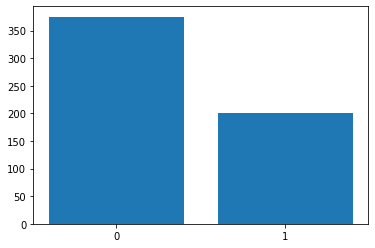

In [44]:
plt.bar(x,height,tick_label=x)

In [110]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,qp,k=13):
    vals=[]
    for i in range(x.shape[0]):
        d = dist(qp,x[i])
        vals.append((d,y[i]))
    vals = np.array(sorted(vals))
    predict=np.unique(vals[:k,1],return_counts=True)
    index = predict[1].argmax()
 #   print(vals)
    return predict[0][index]
    
        

In [141]:
ypred=[]
for test in df_xt.values[:,1:]:
    ypred.append(knn(x_val[:,1:],cnt,test,11))
np.mean(ytest==ypred)

0.3333333333333333

In [151]:
len(cnt)

576

In [131]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,168,88,42,321,38.2,0.787,40,1
1,8,110,76,0,0,27.8,0.237,58,0
2,7,147,76,0,0,39.4,0.257,43,1
3,2,100,66,20,90,32.9,0.867,28,1
4,4,129,86,20,270,35.1,0.231,23,0
...,...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23,0
572,7,187,68,39,304,37.7,0.254,41,1
573,2,122,60,18,106,29.8,0.717,22,0
574,4,154,72,29,126,31.3,0.338,37,0


In [26]:
x_valn=pd.concat([df.iloc[:,1:2],df.iloc[:,4:8]],axis=1).values
xtesn=pd.concat([df_xt.iloc[:,1:2],df_xt.iloc[:,4:8]],axis=1).values
xtesn.shape


(192, 5)

In [20]:
ypred=[]
for test in xtesn:
    ypred.append(knn(x_valn,cnt,test,11))
np.mean(ytest==ypred)

0.3958333333333333

In [23]:
ypred=np.array(ypred)
ypred.shape

(192,)